In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
import time



In [2]:
df=pd.read_csv(r"C:\Users\reyha\Desktop\data science class\telco customer churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


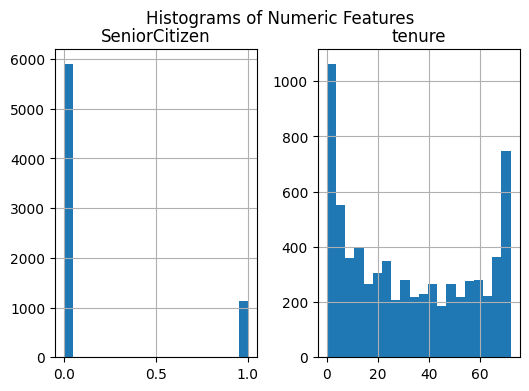

In [4]:
df.select_dtypes(include=["int64"]).hist(figsize=(6,4), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Pip 21.3+ is required
!pip install -U xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
for col in df.columns:
    if df[col].nunique()==3 and df[col].dtype=="object":
        print(col,df[col].unique())
for col in df.columns:
     if df[col].nunique()==2 and (df[col].dtype=="object" or df[col].dtype=="int64"):
        print(col,df[col].unique())
                 

MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [11]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
mask = (df["tenure"] == 0) & (df["TotalCharges"].str.strip() == "")

# نمایش ردیف‌ها
print(df.loc[mask, ["customerID", "tenure", "TotalCharges"]])
print("تعداد ردیف‌ها:", mask.sum())

      customerID  tenure TotalCharges
488   4472-LVYGI       0             
753   3115-CZMZD       0             
936   5709-LVOEQ       0             
1082  4367-NUYAO       0             
1340  1371-DWPAZ       0             
3331  7644-OMVMY       0             
3826  3213-VVOLG       0             
4380  2520-SGTTA       0             
5218  2923-ARZLG       0             
6670  4075-WKNIU       0             
6754  2775-SEFEE       0             
تعداد ردیف‌ها: 11


In [13]:
df= df.replace(r'^\s*$', np.nan, regex=True)

In [14]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
if "tenure" in df.columns:  
    df.loc[df["tenure"] == 0, "TotalCharges"] = 0


In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
print(df["TotalCharges"].dtype)

float64


In [17]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# ستون SeniorCitizen
print("Min SeniorCitizen:", df["SeniorCitizen"].min())
print("Any negative in SeniorCitizen?:", (df["SeniorCitizen"] < 0).any())

# ستون tenure
print("Min tenure:", df["tenure"].min())
print("Any negative in tenure?:", (df["tenure"] < 0).any())


Min SeniorCitizen: 0
Any negative in SeniorCitizen?: False
Min tenure: 0
Any negative in tenure?: False


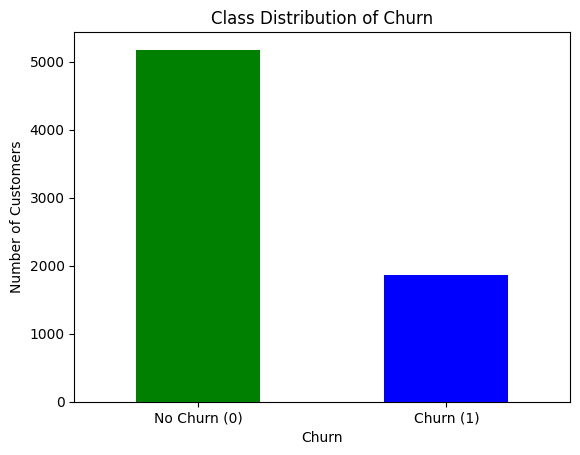

In [19]:
counts = df["Churn"].value_counts()
counts.plot(kind="bar", color=["green","blue"])
plt.xticks([0,1], ["No Churn (0)", "Churn (1)"], rotation=0)
plt.ylabel("Number of Customers")
plt.title("Class Distribution of Churn")
plt.show()

In [20]:
binary_cols = [col for col in df.columns 
               if df[col].nunique() == 2 and df[col].dtype == "object"]

le = LabelBinarizer()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [21]:

cols_ohe = [c for c in df.columns if df[c].dtype == "object" and df[c].nunique() == 3]

if cols_ohe:

        ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  
    

        enc_arr = ohe.fit_transform(df[cols_ohe])
        enc_df  = pd.DataFrame(enc_arr,
                           columns=ohe.get_feature_names_out(cols_ohe),
                           index=df.index)

    
        df = df.drop(columns=cols_ohe).join(enc_df)




In [22]:
pay_ene=OneHotEncoder(sparse_output=False, handle_unknown="ignore")
pay_arr = pay_ene.fit_transform(df[["PaymentMethod"]])
pay_df = pd.DataFrame(pay_arr,
                      columns=pay_ene.get_feature_names_out(["PaymentMethod"]),
                      index=df.index)

df = df.drop(columns="PaymentMethod").join(pay_df)

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df.shape

(7043, 42)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int32  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int32  
 4   Dependents                               7043 non-null   int32  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int32  
 7   PaperlessBilling                         7043 non-null   int32  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

In [26]:
#model
X=df.drop(columns=["customerID","Churn"])
y = df["Churn"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [ ]:
#xgboost model
param = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [50, 100, 200],
    "subsample": [0.8,1.0],
    "colsample_bytree": [0.8,1.0],
}


base_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    random_state=42   
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rnd_model = RandomizedSearchCV(
    estimator=base_clf,
    param_distributions=param,
    n_iter=15,                 
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    refit=True,
    random_state=42,
    verbose=2
)
t0 = time.time()
rnd_model.fit(X, y)            
xgb_time = time.time() - t0


print(f"Training time: {xgb_time:.2f} seconds")
print("Best CV AUC:", rnd_model.best_score_)
print("Best params:", rnd_model.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Training time: 12.86 seconds
Best CV AUC: 0.84861726435727
Best params: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [29]:
results = pd.DataFrame(rnd_model.cv_results_)
print(results[["params","mean_test_score","std_test_score","rank_test_score"]].head())


                                              params  mean_test_score  \
0  {'subsample': 1.0, 'n_estimators': 200, 'max_d...         0.843495   
1  {'subsample': 0.8, 'n_estimators': 200, 'max_d...         0.833691   
2  {'subsample': 0.8, 'n_estimators': 200, 'max_d...         0.844303   
3  {'subsample': 1.0, 'n_estimators': 200, 'max_d...         0.843533   
4  {'subsample': 0.8, 'n_estimators': 100, 'max_d...         0.839760   

   std_test_score  rank_test_score  
0        0.009312                5  
1        0.009538               14  
2        0.009975                3  
3        0.010626                4  
4        0.010424                9  


In [30]:
best_model = rnd_model.best_estimator_
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [31]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")


Accuracy: 0.80
Confusion Matrix:
[[939  96]
 [183 191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



Test ROC-AUC: 0.84655248133509


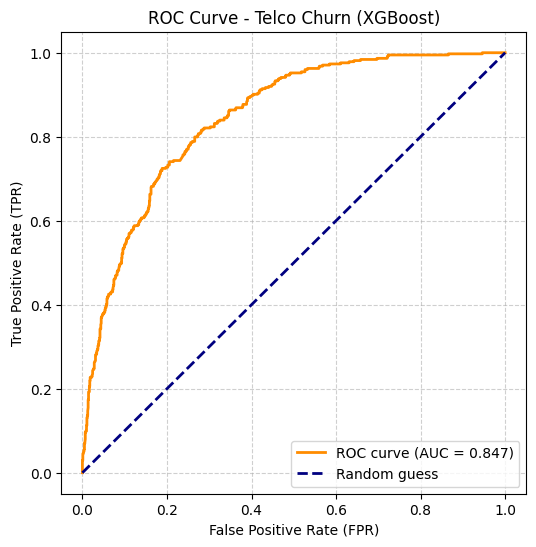

In [ ]:
y_proba = best_model.predict_proba(X_test)[:, 1]  
auc = roc_auc_score(y_test, y_proba)
print("Test ROC-AUC:", auc)

fpr, tpr, thr = roc_curve(y_test, y_proba)


plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--", label="Random guess")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Telco Churn (XGBoost)")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

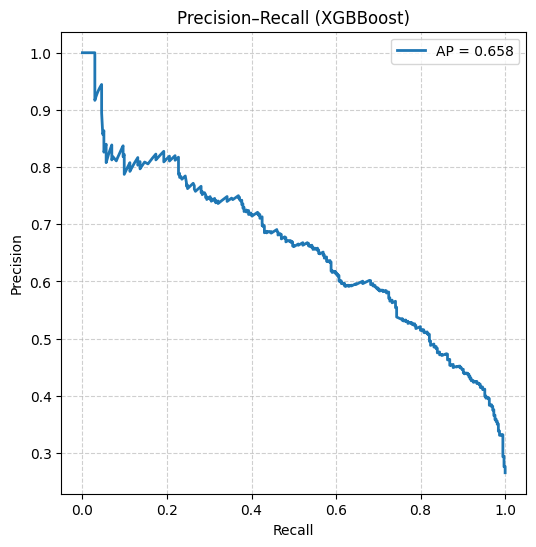

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_proba = best_model.predict_proba(X_test)[:,1]
ap = average_precision_score(y_test, y_proba)
p, r, th = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,6))
plt.plot(r, p, lw=2, label=f'AP = {ap:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision–Recall (XGBBoost)')
plt.legend(); plt.grid(True, ls='--', alpha=0.6); plt.show()


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# Youden's J: tpr - fpr را بیشینه کن
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y_test, y_proba)
j_scores = tpr - fpr
t_opt = thr[j_scores.argmax()]  

y_pred = (y_proba >= t_opt).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Optimal threshold:", float(t_opt))
print(cm)
print(classification_report(y_test, y_pred, digits=3))


Optimal threshold: 0.35771748423576355
[[840 195]
 [103 271]]
              precision    recall  f1-score   support

           0      0.891     0.812     0.849      1035
           1      0.582     0.725     0.645       374

    accuracy                          0.789      1409
   macro avg      0.736     0.768     0.747      1409
weighted avg      0.809     0.789     0.795      1409



In [33]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Figure size 5600x3200 with 0 Axes>

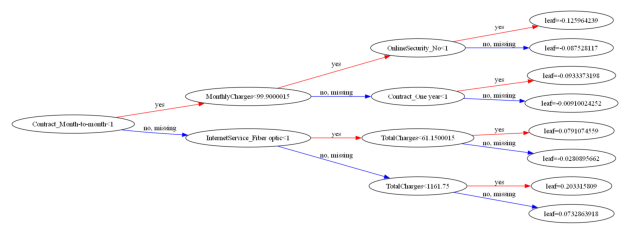

In [ ]:
from xgboost import plot_tree



booster = best_model.get_booster()   

plt.figure(figsize=(28, 16), dpi=200)       
plot_tree(booster, num_trees=0, rankdir="LR")
plt.tight_layout()
plt.savefig("xgb_tree_0.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 5600x3200 with 0 Axes>

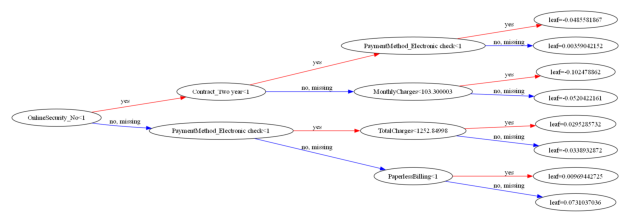

In [ ]:
from xgboost import plot_tree



booster = best_model.get_booster()   

plt.figure(figsize=(28, 16), dpi=200)       
plot_tree(booster, num_trees=10, rankdir="LR")
plt.tight_layout()
plt.savefig("xgb_tree_0.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from xgboost import to_graphviz

booster = best_model.get_booster()
g = to_graphviz(booster, num_trees=0, rankdir="LR")  

g.render("xgb_tree_0", format="svg")   



'xgb_tree_0.svg'

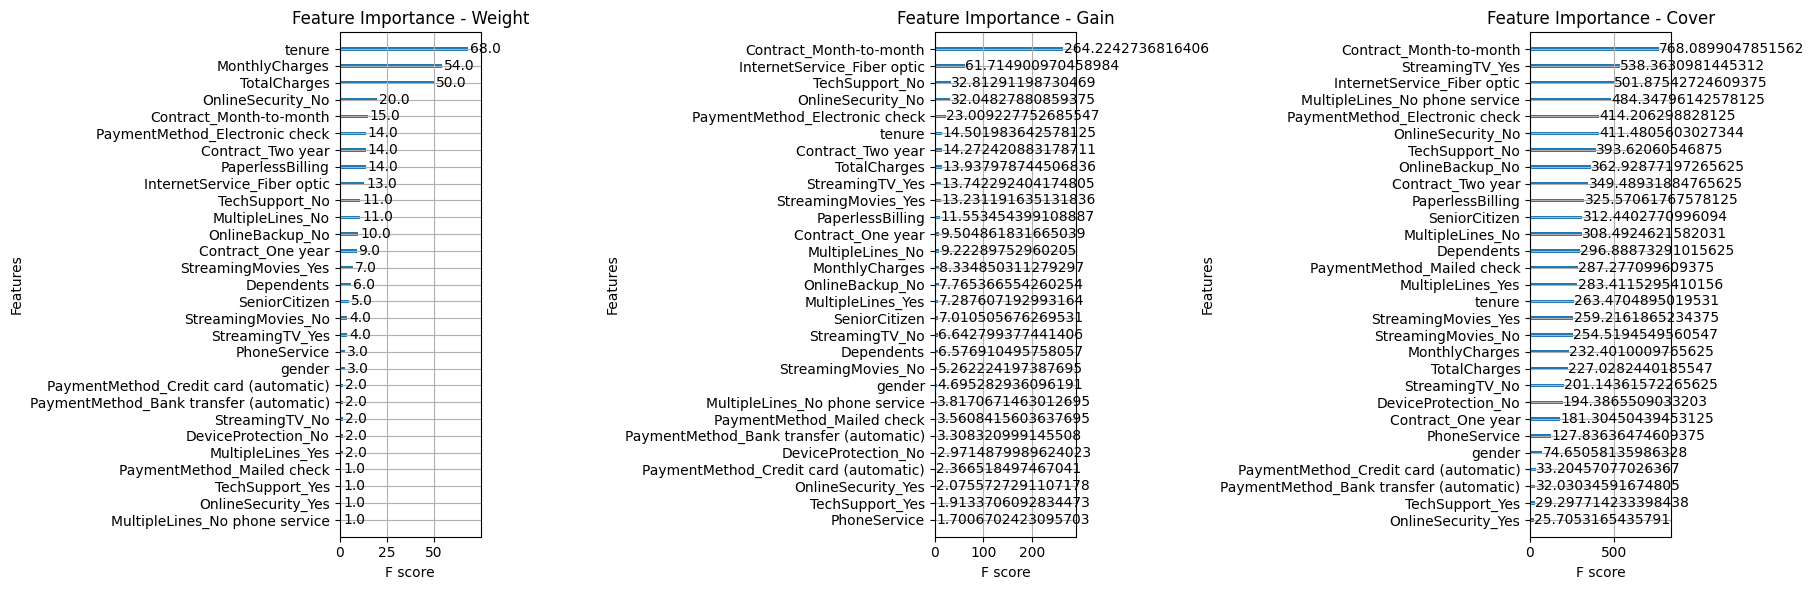

In [ ]:
from xgboost import plot_importance


booster = best_model.get_booster()  

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


plot_importance(booster, importance_type="weight", ax=axes[0])
axes[0].set_title("Feature Importance - Weight")


plot_importance(booster, importance_type="gain", ax=axes[1])
axes[1].set_title("Feature Importance - Gain")


plot_importance(booster, importance_type="cover", ax=axes[2])
axes[2].set_title("Feature Importance - Cover")

plt.tight_layout()
plt.show()


In [37]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


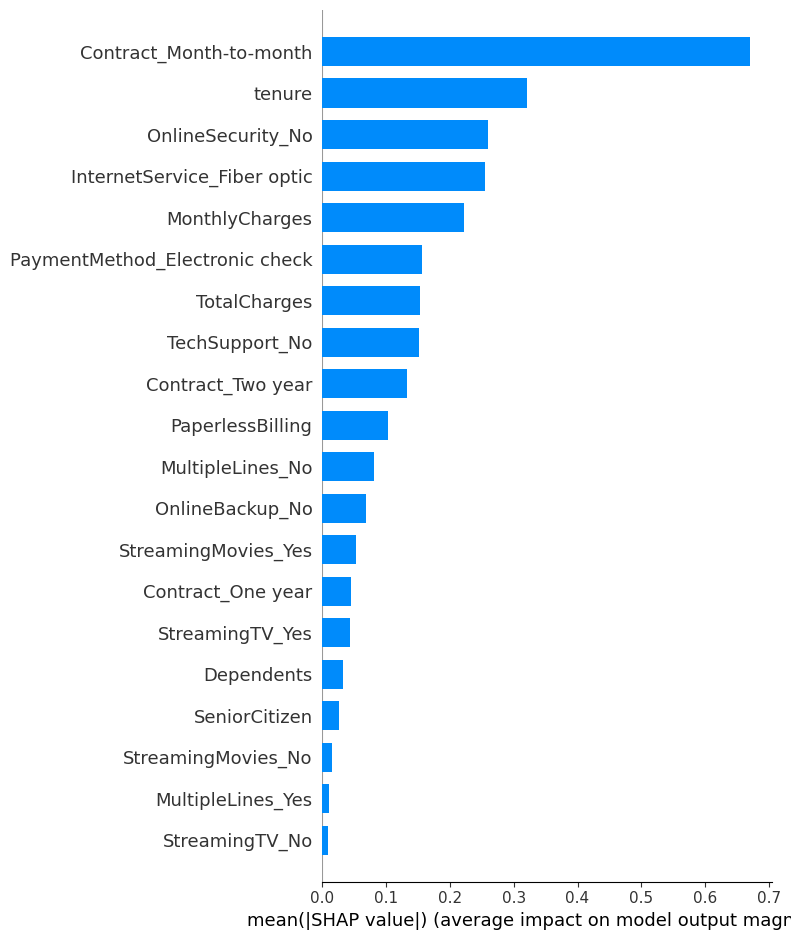

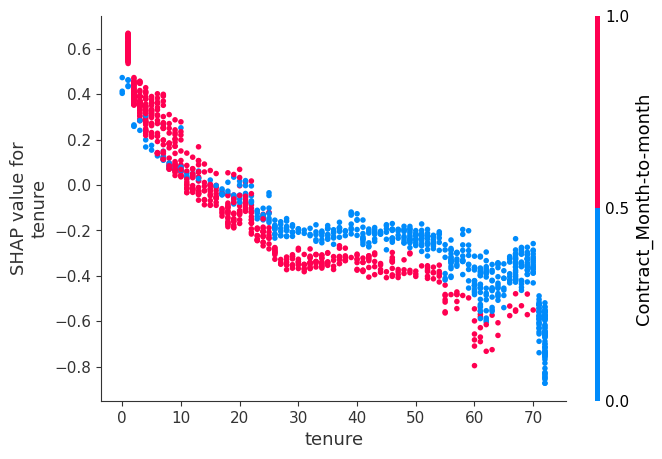

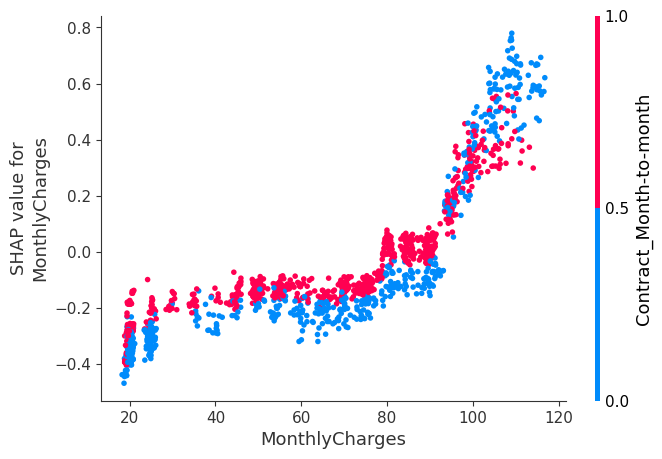

In [ ]:

import shap


shap.initjs()


explainer   = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, plot_type="bar")


i = 0
shap.force_plot(explainer.expected_value, shap_values[i, :], X_test.iloc[i, :])


shap.dependence_plot("tenure", shap_values, X_test)
shap.dependence_plot("MonthlyCharges", shap_values, X_test)
